In [1]:
# The jupyter script is used to carry out the analysis of group runs
# this is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
# take average of music therpy group per task
# take average of control group per task
# run 12 second sliding window on each group per task
# dataset is resampled due to undersampling during the recording
# ICA, notch and bandpass filtering are implmeneted to mitigate eeg noise
# results: spectogram and average bandpower comparison betwen timepoints per channel per brainwave

In [2]:
from helper import*
from params import*

In [3]:
"extract EEG scans from database"
table_names = allSQLTableNames(hostName,userName,userPassword,databaseName)
tables = multiSQLTablesToDataframes(hostName,userName,userPassword,databaseName,table_names)
allRawEEG = multiTransformTableToRawEEG(tables,fs,collection_time,fs_setting)

MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
M

In [4]:
"""
Index of filename per group per task for both the music therapy and control group
coding example:
                MT11 = MUSIC THERAPY (GROUP 1,TASK 1)
                CT11 = CONTROL (GROUP 1,TASK 1)
"""
#   index of filename per group per task for the music therapy group
idx_MT11 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[0]))
idx_MT12 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[1]))
idx_MT13 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[2]))
idx_MT21 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[0]))
idx_MT22 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[1]))
idx_MT23 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[2]))
#  index of filename per group per task for the control group
idx_CT11 = list(mit.locate(table_names, lambda x: x in controlGroup_1[0]))
idx_CT12 = list(mit.locate(table_names, lambda x: x in controlGroup_1[1]))
idx_CT13 = list(mit.locate(table_names, lambda x: x in controlGroup_1[2]))
idx_CT21 = list(mit.locate(table_names, lambda x: x in controlGroup_2[0]))  
idx_CT22 = list(mit.locate(table_names, lambda x: x in controlGroup_2[1]))
idx_CT23 = list(mit.locate(table_names, lambda x: x in controlGroup_2[2]))

In [5]:
"use indices from above to extract eeg for both the music therapy and control group"
#   EEG for music therapy group per timepoint per task
avgEEG_MT11 = np.mean(allRawEEG[idx_MT11],axis=0)
avgEEG_MT12 = np.mean(allRawEEG[idx_MT12],axis=0)
avgEEG_MT13 = np.mean(allRawEEG[idx_MT13],axis=0)
avgEEG_MT21 = np.mean(allRawEEG[idx_MT21],axis=0)
avgEEG_MT22 = np.mean(allRawEEG[idx_MT22],axis=0)
avgEEG_MT23 = np.mean(allRawEEG[idx_MT23],axis=0)
#   EEG for control group per timepoint per task
avgEEG_CT11 = np.mean(allRawEEG[idx_CT11],axis=0)
avgEEG_CT12 = np.mean(allRawEEG[idx_CT12],axis=0)
avgEEG_CT13 = np.mean(allRawEEG[idx_CT13],axis=0)
avgEEG_CT21 = np.mean(allRawEEG[idx_CT21],axis=0)
avgEEG_CT22 = np.mean(allRawEEG[idx_CT22],axis=0)
avgEEG_CT23 = np.mean(allRawEEG[idx_CT23],axis=0)

In [6]:
"Compute independent component analysis on the averaged raw EEG data"
#   compute ICA for music therapy group
ica_MT11 = customICA(avgEEG_MT11,tuneval)
ica_MT12 = customICA(avgEEG_MT12,tuneval)
ica_MT13 = customICA(avgEEG_MT13,tuneval)
ica_MT21 = customICA(avgEEG_MT21,tuneval)
ica_MT22 = customICA(avgEEG_MT22,tuneval)
ica_MT23 = customICA(avgEEG_MT23,tuneval)
#   compute ICA for control group
ica_CT11 = customICA(avgEEG_CT11,tuneval)
ica_CT12 = customICA(avgEEG_CT12,tuneval)
ica_CT13 = customICA(avgEEG_CT13,tuneval)
ica_CT21 = customICA(avgEEG_CT21,tuneval)
ica_CT22 = customICA(avgEEG_CT22,tuneval)
ica_CT23 = customICA(avgEEG_CT23,tuneval)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

In [7]:
"Compute the notch filtered EEG for both the music therapy and control group"
noc=filters()
#   notch filtered EEG for music therapy group
notch_MT11 = noc.notch(ica_MT11,line,fs,Q)
notch_MT12 = noc.notch(ica_MT12,line,fs,Q)
notch_MT13 = noc.notch(ica_MT13,line,fs,Q)
notch_MT21 = noc.notch(ica_MT21,line,fs,Q)
notch_MT22 = noc.notch(ica_MT22,line,fs,Q)
notch_MT23 = noc.notch(ica_MT23,line,fs,Q)
#   notch filtered EEG for control group
notch_CT11 = noc.notch(ica_CT11,line,fs,Q)
notch_CT12 = noc.notch(ica_CT12,line,fs,Q)
notch_CT13 = noc.notch(ica_CT13,line,fs,Q)
notch_CT21 = noc.notch(ica_CT21,line,fs,Q)
notch_CT22 = noc.notch(ica_CT22,line,fs,Q)
notch_CT23 = noc.notch(ica_CT23,line,fs,Q)

In [8]:
"Generate the band pass filtered EEG for both the music therapy and control group"
bp = filters()
#   band pass filtered EEG for music therapy group
bp_MT11 = bp.butterBandPass(notch_MT11,lowcut,highcut,fs,order)
bp_MT12 = bp.butterBandPass(notch_MT12,lowcut,highcut,fs,order)
bp_MT13 = bp.butterBandPass(notch_MT13,lowcut,highcut,fs,order)
bp_MT21 = bp.butterBandPass(notch_MT21,lowcut,highcut,fs,order)
bp_MT22 = bp.butterBandPass(notch_MT22,lowcut,highcut,fs,order)
bp_MT23 = bp.butterBandPass(notch_MT23,lowcut,highcut,fs,order)
#   band pass filtered EEG for control group
bp_CT11 = bp.butterBandPass(notch_CT11,lowcut,highcut,fs,order)
bp_CT12 = bp.butterBandPass(notch_CT12,lowcut,highcut,fs,order)
bp_CT13 = bp.butterBandPass(notch_CT13,lowcut,highcut,fs,order)
bp_CT21 = bp.butterBandPass(notch_CT21,lowcut,highcut,fs,order)
bp_CT22 = bp.butterBandPass(notch_CT22,lowcut,highcut,fs,order)
bp_CT23 = bp.butterBandPass(notch_CT23,lowcut,highcut,fs,order)

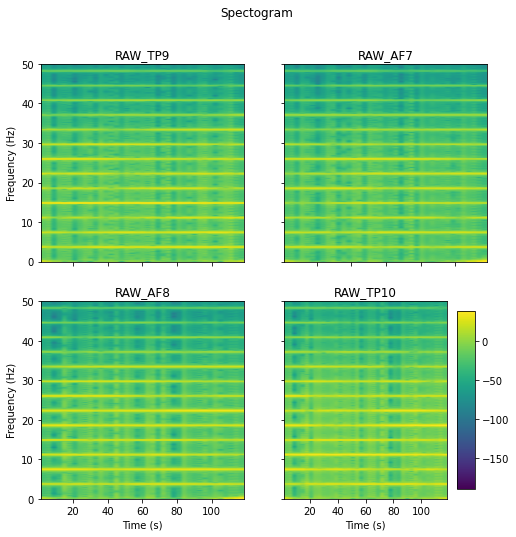

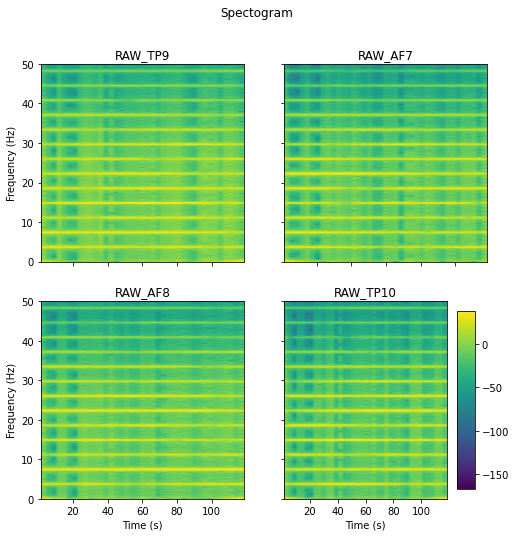

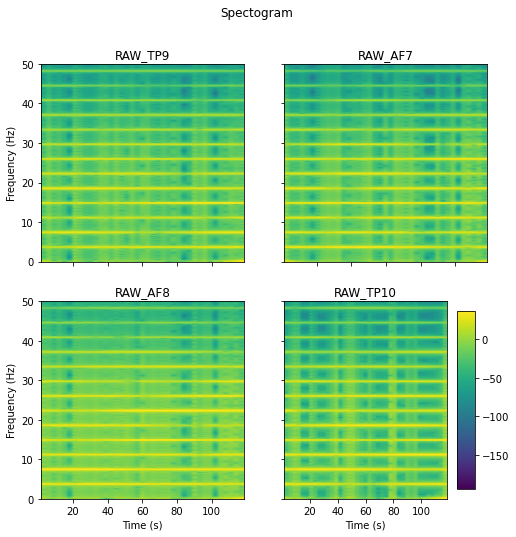

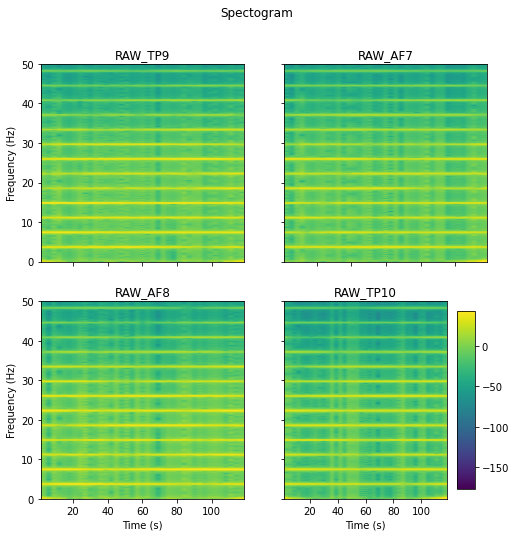

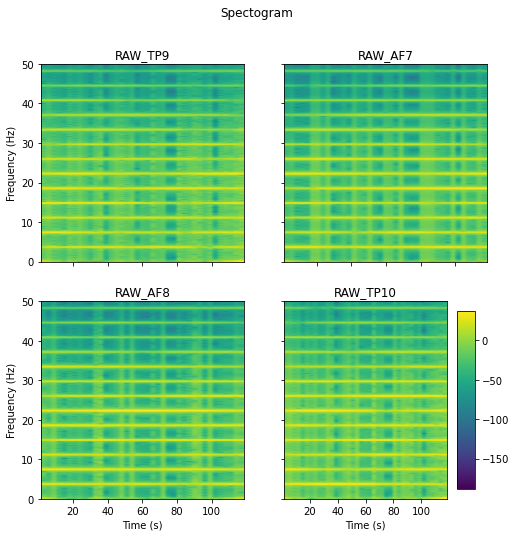

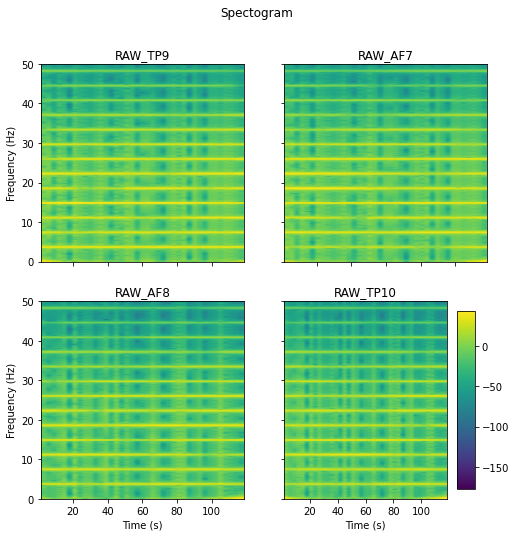

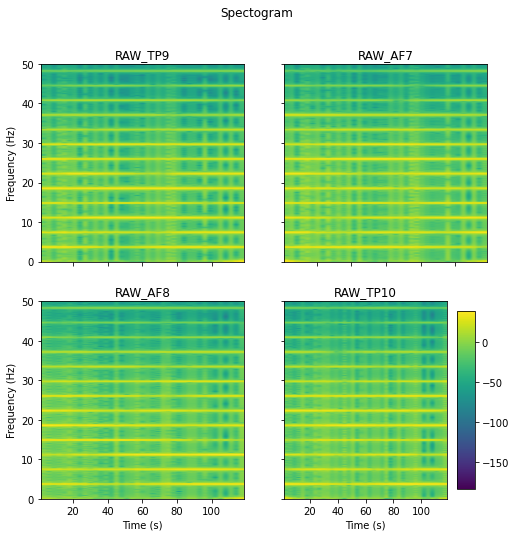

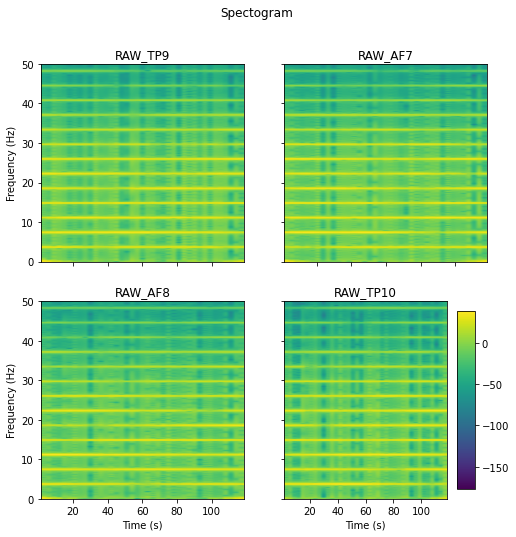

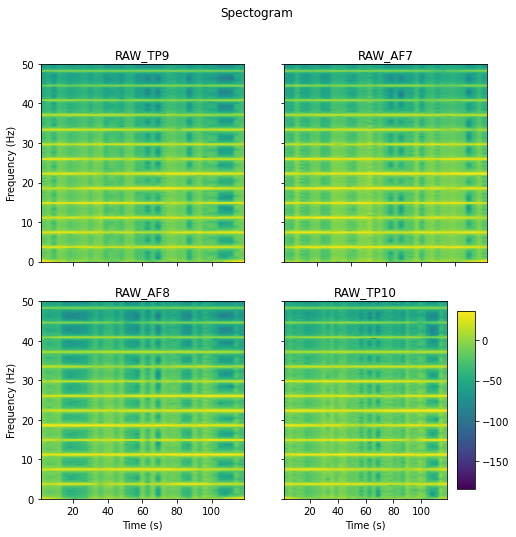

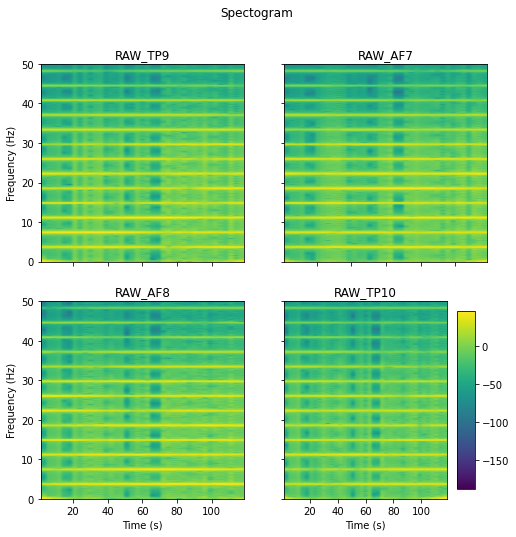

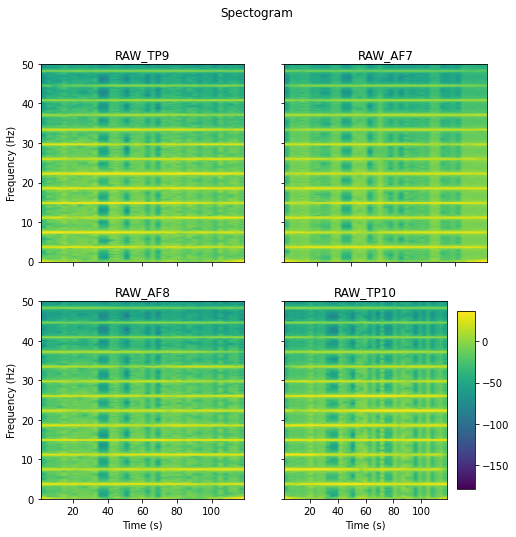

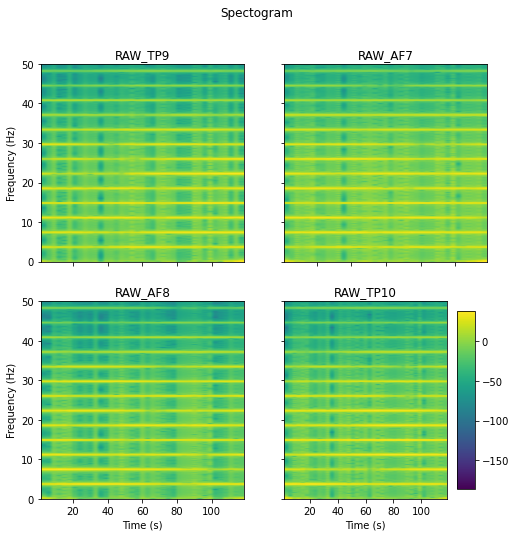

In [9]:
"Generate spectogram for both the music therapy and control group"
#   spectogram for music therapy group
spectogramPlot(bp_MT11,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_MT12,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_MT13,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_MT21,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_MT22,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_MT23,fs,nfft,noverlap,figSize,plotTitles)
#   spectogram for control group
spectogramPlot(bp_CT11,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_CT12,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_CT13,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_CT21,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_CT22,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bp_CT23,fs,nfft,noverlap,figSize,plotTitles)

In [10]:
"Generate rolling window arrays for both the music therapy and control group"
#   rolling window arrays for music therapy group


b = np.array([[1,2,3,4,5,6,7,8,8,9,9,9,9,87,6,5,4,3,2,4],
              [2,2,2,2,2,2,2,2,2,2,5,6,7,4,4,4,4,4,4,4]]).T
br = rollingWindow(b,3,3)
rw_MT11 = rollingWindow(bp_MT11,window_size,step_size)
rw_MT12 = rollingWindow(bp_MT12,window_size,step_size)
rw_MT13 = rollingWindow(bp_MT13,window_size,step_size)
rw_MT21 = rollingWindow(bp_MT21,window_size,step_size)
rw_MT22 = rollingWindow(bp_MT22,window_size,step_size)
rw_MT23 = rollingWindow(bp_MT23,window_size,step_size)
#   rolling window arrays for control group
rw_CT11 = rollingWindow(bp_CT11,window_size,step_size)
rw_CT12 = rollingWindow(bp_CT12,window_size,step_size)
rw_CT13 = rollingWindow(bp_CT13,window_size,step_size)
rw_CT21 = rollingWindow(bp_CT21,window_size,step_size)
rw_CT22 = rollingWindow(bp_CT22,window_size,step_size)
rw_CT23 = rollingWindow(bp_CT23,window_size,step_size)

In [11]:
"compute power spectrum of each window per channel"
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]

In [12]:
"Compute the average band power for both the music therapy and control group"
#   compute average delta band power for both music therapy and control group
delta_MT11 = averageBandPower(rw_MT11,'3D',fs,delta_low,delta_high,win)
delta_MT12 = averageBandPower(rw_MT12,'3D',fs,delta_low,delta_high,win)
delta_MT13 = averageBandPower(rw_MT13,'3D',fs,delta_low,delta_high,win)
delta_MT21 = averageBandPower(rw_MT21,'3D',fs,delta_low,delta_high,win)
delta_MT22 = averageBandPower(rw_MT22,'3D',fs,delta_low,delta_high,win)
delta_MT23 = averageBandPower(rw_MT23,'3D',fs,delta_low,delta_high,win)
delta_CT11 = averageBandPower(rw_CT11,'3D',fs,delta_low,delta_high,win)
delta_CT12 = averageBandPower(rw_CT12,'3D',fs,delta_low,delta_high,win)
delta_CT13 = averageBandPower(rw_CT13,'3D',fs,delta_low,delta_high,win)
delta_CT21 = averageBandPower(rw_CT21,'3D',fs,delta_low,delta_high,win)
delta_CT22 = averageBandPower(rw_CT22,'3D',fs,delta_low,delta_high,win)
delta_CT23 = averageBandPower(rw_CT23,'3D',fs,delta_low,delta_high,win)
#   compute average theta band power for both music therapy and control group
theta_MT11 = averageBandPower(rw_MT11,'3D',fs,theta_low,theta_high,win)
theta_MT12 = averageBandPower(rw_MT12,'3D',fs,theta_low,theta_high,win)
theta_MT13 = averageBandPower(rw_MT13,'3D',fs,theta_low,theta_high,win)
theta_MT21 = averageBandPower(rw_MT21,'3D',fs,theta_low,theta_high,win)
theta_MT22 = averageBandPower(rw_MT22,'3D',fs,theta_low,theta_high,win)
theta_MT23 = averageBandPower(rw_MT23,'3D',fs,theta_low,theta_high,win)
theta_CT11 = averageBandPower(rw_CT11,'3D',fs,theta_low,theta_high,win)
theta_CT12 = averageBandPower(rw_CT12,'3D',fs,theta_low,theta_high,win)
theta_CT13 = averageBandPower(rw_CT13,'3D',fs,theta_low,theta_high,win)
theta_CT21 = averageBandPower(rw_CT21,'3D',fs,theta_low,theta_high,win)
theta_CT22 = averageBandPower(rw_CT22,'3D',fs,theta_low,theta_high,win)
theta_CT23 = averageBandPower(rw_CT23,'3D',fs,theta_low,theta_high,win)
#   compute average alpha band power for both music therapy and control group
alpha_MT11 = averageBandPower(rw_MT11,'3D',fs,alpha_low,alpha_high,win)
alpha_MT12 = averageBandPower(rw_MT12,'3D',fs,alpha_low,alpha_high,win)
alpha_MT13 = averageBandPower(rw_MT13,'3D',fs,alpha_low,alpha_high,win)
alpha_MT21 = averageBandPower(rw_MT21,'3D',fs,alpha_low,alpha_high,win)
alpha_MT22 = averageBandPower(rw_MT22,'3D',fs,alpha_low,alpha_high,win)
alpha_MT23 = averageBandPower(rw_MT23,'3D',fs,alpha_low,alpha_high,win)
alpha_CT11 = averageBandPower(rw_CT11,'3D',fs,alpha_low,alpha_high,win)
alpha_CT12 = averageBandPower(rw_CT12,'3D',fs,alpha_low,alpha_high,win)
alpha_CT13 = averageBandPower(rw_CT13,'3D',fs,alpha_low,alpha_high,win)
alpha_CT21 = averageBandPower(rw_CT21,'3D',fs,alpha_low,alpha_high,win)
alpha_CT22 = averageBandPower(rw_CT22,'3D',fs,alpha_low,alpha_high,win)
alpha_CT23 = averageBandPower(rw_CT23,'3D',fs,alpha_low,alpha_high,win)
#   compute average beta band power for both music therapy and control group
beta_MT11 = averageBandPower(rw_MT11,'3D',fs,beta_low,beta_high,win)
beta_MT12 = averageBandPower(rw_MT12,'3D',fs,beta_low,beta_high,win)
beta_MT13 = averageBandPower(rw_MT13,'3D',fs,beta_low,beta_high,win)
beta_MT21 = averageBandPower(rw_MT21,'3D',fs,beta_low,beta_high,win)
beta_MT22 = averageBandPower(rw_MT22,'3D',fs,beta_low,beta_high,win)
beta_MT23 = averageBandPower(rw_MT23,'3D',fs,beta_low,beta_high,win)
beta_CT11 = averageBandPower(rw_CT11,'3D',fs,beta_low,beta_high,win)
beta_CT12 = averageBandPower(rw_CT12,'3D',fs,beta_low,beta_high,win)
beta_CT13 = averageBandPower(rw_CT13,'3D',fs,beta_low,beta_high,win)
beta_CT21 = averageBandPower(rw_CT21,'3D',fs,beta_low,beta_high,win)
beta_CT22 = averageBandPower(rw_CT22,'3D',fs,beta_low,beta_high,win)
beta_CT23 = averageBandPower(rw_CT23,'3D',fs,beta_low,beta_high,win)
#   compute average gamma band power for both music therapy and control group
gamma_MT11 = averageBandPower(rw_MT11,'3D',fs,gamma_low,gamma_high,win)
gamma_MT12 = averageBandPower(rw_MT12,'3D',fs,gamma_low,gamma_high,win)
gamma_MT13 = averageBandPower(rw_MT13,'3D',fs,gamma_low,gamma_high,win)
gamma_MT21 = averageBandPower(rw_MT21,'3D',fs,gamma_low,gamma_high,win)
gamma_MT22 = averageBandPower(rw_MT22,'3D',fs,gamma_low,gamma_high,win)
gamma_MT23 = averageBandPower(rw_MT23,'3D',fs,gamma_low,gamma_high,win)
gamma_CT11 = averageBandPower(rw_CT11,'3D',fs,gamma_low,gamma_high,win)
gamma_CT12 = averageBandPower(rw_CT12,'3D',fs,gamma_low,gamma_high,win)
gamma_CT13 = averageBandPower(rw_CT13,'3D',fs,gamma_low,gamma_high,win)
gamma_CT21 = averageBandPower(rw_CT21,'3D',fs,gamma_low,gamma_high,win)
gamma_CT22 = averageBandPower(rw_CT22,'3D',fs,gamma_low,gamma_high,win)
gamma_CT23 = averageBandPower(rw_CT23,'3D',fs,gamma_low,gamma_high,win)

In [13]:
#   compute average delta band power for both music therapy and control group
data_pre = np.vstack((delta_CT11,delta_CT12,delta_CT13,delta_MT11,delta_MT12,delta_MT13,
                    theta_CT11,theta_CT12,theta_CT13,theta_MT11,theta_MT12,theta_MT13,
                    alpha_CT11,alpha_CT12,alpha_CT13,beta_CT11,alpha_MT11,alpha_MT12,alpha_MT13,
                    beta_CT11,beta_CT12,beta_CT13,beta_MT11,beta_MT12,beta_MT13,
                    gamma_CT11,gamma_CT12,gamma_CT13,gamma_MT11,gamma_MT12,gamma_MT13))

data_post = np.vstack((delta_CT21,delta_CT22,delta_CT23,delta_MT21,delta_MT22,delta_MT23,
                    theta_CT21,theta_CT22,theta_CT23,theta_MT21,theta_MT22,theta_MT23,
                    alpha_CT21,alpha_CT22,alpha_CT23,beta_CT21,alpha_MT21,alpha_MT22,alpha_MT23,
                    beta_CT21,beta_CT22,beta_CT23,beta_MT21,beta_MT22,beta_MT23,
                    gamma_CT21,gamma_CT22,gamma_CT23,gamma_MT21,gamma_MT22,gamma_MT23))
                    
data_pre = np.hstack((data_pre[:,0],data_pre[:,1],data_pre[:,2],data_pre[:,3]))
data_post = np.hstack((data_post[:,0],data_post[:,1],data_post[:,2],data_post[:,3]))

diff = data_pre - data_post

def normalityTest(data):
    print ("null hypothesis: data is normal")
    print ("Executing Shapiro Wilks Test...")
    if shapiro(data)[1] < 0.05:
        pVal = shapiro(data)[1]
        print ("alternative hypothesis: data is not normal", pVal)
    if shapiro(data)[1] > 0.05:
        pVal = shapiro(data)[1]
        print ("alternative hypothesis: data is not normal", pVal)
    if shapiro(data)[1] == 0:
        print ("Executing D’Agostino’s K^2 test Test...")
        if stats.normaltest(diff)[1] < 0.05:
            pVal = stats.normaltest(diff)[1]
            print ("alternative hypothesis: data is not normal", pVal)
        if stats.normaltest(diff)[1] > 0.05:
            pVal = stats.normaltest(diff)[1]
            print ("alternative hypothesis: data is normal", pVal)
        if stats.normaltest(diff)[1] == 0:
            print ("Executing Anderson-Darling Test...")
            result = anderson(data)
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    pass

test = normalityTest(diff)

null hypothesis: data is normal
Executing Shapiro Wilks Test...
alternative hypothesis: data is not normal 9.49647226813491e-29


In [14]:
"""
Compute paired t-test for the difference between the average alpha band power for the two groups
Coding Example:
                MT12 = MUSIC THERAPY (GROUP 1,GROUP 2)
                CT12 = CONTROL (GROUP 1,GROUP 2)
"""
#   compute paired t-test for the difference between the average delta band power for the two groups
ttest_delta_MT1121 = pairedTTest(delta_MT11,delta_MT21, show_output=True,variableName='delta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1222 = pairedTTest(delta_MT12,delta_MT22, show_output=True,variableName='delta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1323 = pairedTTest(delta_MT13,delta_MT23, show_output=True,variableName='delta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1121 = pairedTTest(delta_CT11,delta_CT21, show_output=True,variableName='delta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1222 = pairedTTest(delta_CT12,delta_CT22, show_output=True,variableName='delta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1323 = pairedTTest(delta_CT13,delta_CT23, show_output=True,variableName='delta_CT1323',channelName=['TP9','AF7','AF8','TP10'])
#   compute paired t-test for the difference between the average theta band power for the two groups
ttest_theta_MT1121 = pairedTTest(theta_MT11,theta_MT21, show_output=True,variableName='theta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1222 = pairedTTest(theta_MT12,theta_MT22, show_output=True,variableName='theta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1323 = pairedTTest(theta_MT13,theta_MT23, show_output=True,variableName='theta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1121 = pairedTTest(theta_CT11,theta_CT21, show_output=True,variableName='theta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1222 = pairedTTest(theta_CT12,theta_CT22, show_output=True,variableName='theta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1323 = pairedTTest(theta_CT13,theta_CT23, show_output=True,variableName='theta_CT1323',channelName=['TP9','AF7','AF8','TP10'])
#   compute paired t-test for the difference between the average alpha band power for the two groups
ttest_alpha_MT1121 = pairedTTest(alpha_MT11,alpha_MT21, show_output=True,variableName='alpha_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1222 = pairedTTest(alpha_MT12,alpha_MT22, show_output=True,variableName='alpha_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1323 = pairedTTest(alpha_MT13,alpha_MT23, show_output=True,variableName='alpha_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1121 = pairedTTest(alpha_CT11,alpha_CT21, show_output=True,variableName='alpha_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1222 = pairedTTest(alpha_CT12,alpha_CT22, show_output=True,variableName='alpha_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1323 = pairedTTest(alpha_CT13,alpha_CT23, show_output=True,variableName='alpha_CT1323',channelName=['TP9','AF7','AF8','TP10'])
#   compute paired t-test for the difference between the average beta band power for the two groups
ttest_beta_MT1121 = pairedTTest(beta_MT11,beta_MT21, show_output=True,variableName='beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1222 = pairedTTest(beta_MT12,beta_MT22, show_output=True,variableName='beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1323 = pairedTTest(beta_MT13,beta_MT23, show_output=True,variableName='beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1121 = pairedTTest(beta_CT11,beta_CT21, show_output=True,variableName='beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1222 = pairedTTest(beta_CT12,beta_CT22, show_output=True,variableName='beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1323 = pairedTTest(beta_CT13,beta_CT23, show_output=True,variableName='beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])
#   compute paired t-test for the difference between the average gamma band power for the two groups
ttest_gamma_MT1121 = pairedTTest(gamma_MT11,gamma_MT21, show_output=True,variableName='gamma_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1222 = pairedTTest(gamma_MT12,gamma_MT22, show_output=True,variableName='gamma_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1323 = pairedTTest(gamma_MT13,gamma_MT23, show_output=True,variableName='gamma_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1121 = pairedTTest(gamma_CT11,gamma_CT21, show_output=True,variableName='gamma_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1222 = pairedTTest(gamma_CT12,gamma_CT22, show_output=True,variableName='gamma_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1323 = pairedTTest(gamma_CT13,gamma_CT23, show_output=True,variableName='gamma_CT1323',channelName=['TP9','AF7','AF8','TP10'])

for delta_MT1121 there is no significant difference at TP9 where the P-value = 0.43164
for delta_MT1121 there is no significant difference at AF7 where the P-value = 0.32227
for delta_MT1121 there is no significant difference at AF8 where the P-value = 0.19336
for delta_MT1121 there is no significant difference at TP10 where the P-value = 0.375
for delta_MT1222 there is no significant difference at TP9 where the P-value = 0.49219
for delta_MT1222 there is no significant difference at AF7 where the P-value = 0.08398
for delta_MT1222 there is no significant difference at AF8 where the P-value = 0.23242
for delta_MT1222 there is no significant difference at TP10 where the P-value = 0.16016
for delta_MT1323 there is no significant difference at TP9 where the P-value = 0.32227
for delta_MT1323 there is no significant difference at AF7 where the P-value = 0.92188
for delta_MT1323 there is no significant difference at AF8 where the P-value = 0.23242
for delta_MT1323 there is no significant di

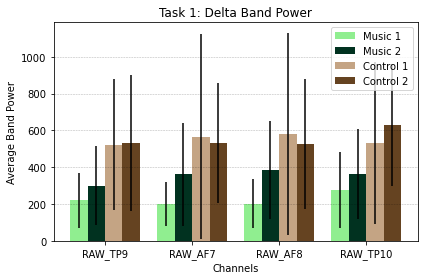

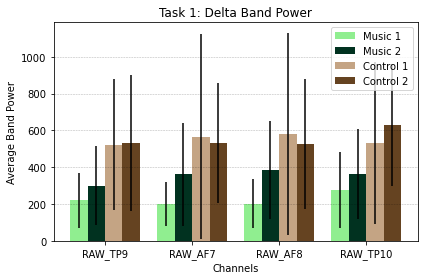

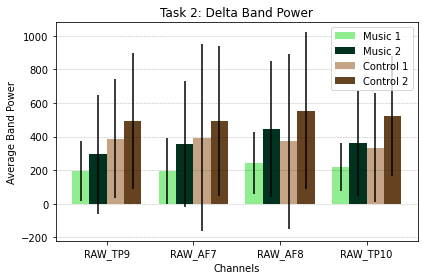

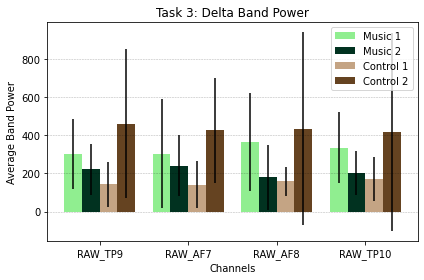

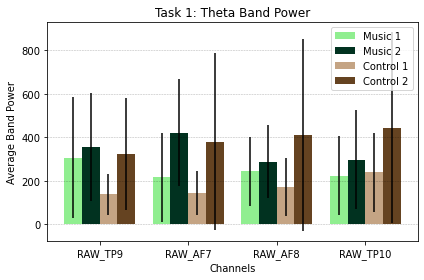

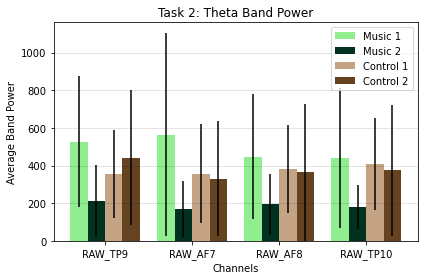

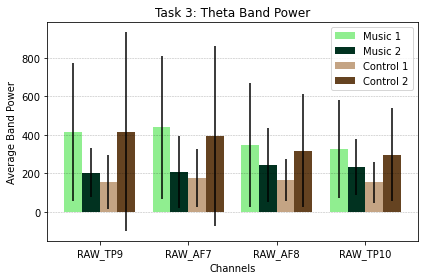

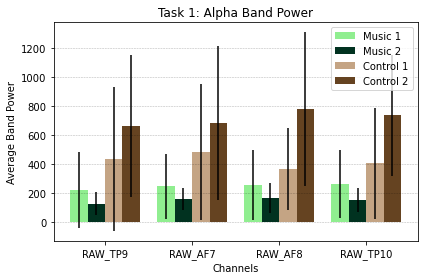

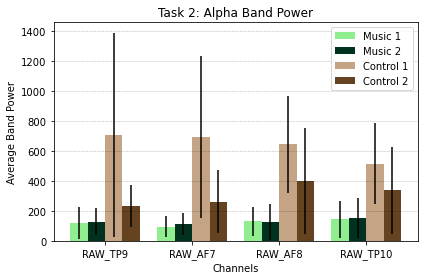

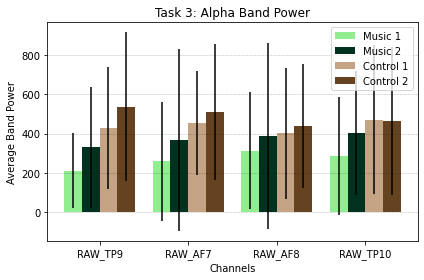

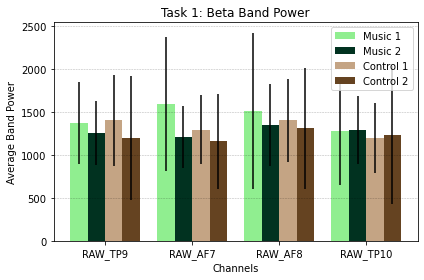

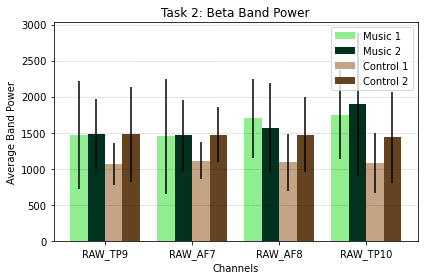

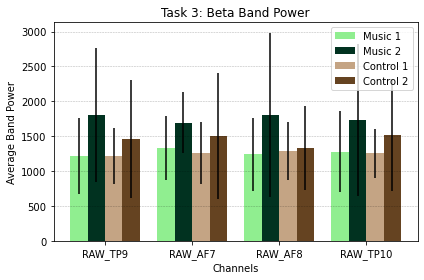

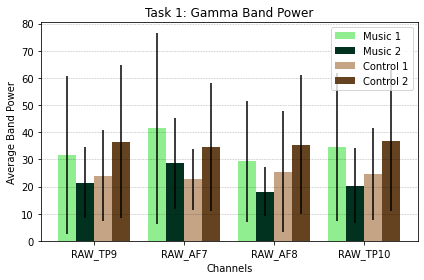

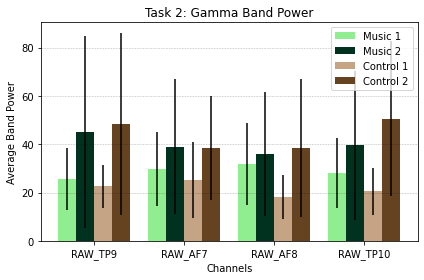

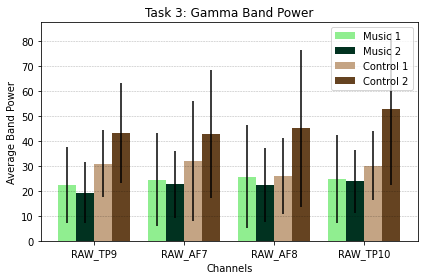

In [15]:
"""
mean comparisons for bands that showed significant differences between the two groups 
(manually developed based on results from above)
"""
mean_delta_MT11,std_delta_MT11 = np.mean(delta_MT11,axis=0),np.std(delta_MT11,axis=0)
mean_delta_MT12,std_delta_MT12 = np.mean(delta_MT12,axis=0),np.std(delta_MT12,axis=0)
mean_delta_MT13,std_delta_MT13 = np.mean(delta_MT13,axis=0),np.std(delta_MT13,axis=0)
mean_delta_MT21,std_delta_MT21 = np.mean(delta_MT21,axis=0),np.std(delta_MT21,axis=0)
mean_delta_MT22,std_delta_MT22 = np.mean(delta_MT22,axis=0),np.std(delta_MT22,axis=0)
mean_delta_MT23,std_delta_MT23 = np.mean(delta_MT23,axis=0),np.std(delta_MT23,axis=0)
mean_delta_CT11,std_delta_CT11 = np.mean(delta_CT11,axis=0),np.std(delta_CT11,axis=0)
mean_delta_CT12,std_delta_CT12 = np.mean(delta_CT12,axis=0),np.std(delta_CT12,axis=0)
mean_delta_CT13,std_delta_CT13 = np.mean(delta_CT13,axis=0),np.std(delta_CT13,axis=0)
mean_delta_CT21,std_delta_CT21 = np.mean(delta_CT21,axis=0),np.std(delta_CT21,axis=0)
mean_delta_CT22,std_delta_CT22 = np.mean(delta_CT22,axis=0),np.std(delta_CT22,axis=0)
mean_delta_CT23,std_delta_CT23 = np.mean(delta_CT23,axis=0),np.std(delta_CT23,axis=0)

groupA_T1,groupA_T2,groupB_T1,groupB_T2 = mean_delta_MT11,mean_delta_MT21,mean_delta_CT11,mean_delta_CT21
grpA_std_T1,grpA_std_T2,grpB_std_T1,grpB_std_T2 = std_delta_MT11,std_delta_MT21,std_delta_CT11,std_delta_CT21
length = len(groupA_T1)
x_labels = plotTitles
groups = studygroups
# Set plot parameters
fig, ax = plt.subplots()
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x,groupA_T1, width, color='#90EE90', label=groups[0], yerr=grpA_std_T1)
ax.bar(x + width,groupA_T2, width, color='#013220', label=groups[1], yerr=grpA_std_T2)
ax.bar(x + (2 * width),groupB_T1, width, color='#C4A484', label=groups[2], yerr=grpB_std_T1)
ax.bar(x + (3 * width),groupB_T2, width, color='#654321', label=groups[3], yerr=grpB_std_T2)
ax.set_ylabel('Average Band Power')
#ylim = np.amax()
#ax.set_ylim(0,1000)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Channels')
ax.set_title('Task 1: Delta Band Power')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout()
plt.show()
pass


meanComparisonPlots([delta_MT11,delta_CT11],[delta_MT21,delta_CT21],plotTitles,studygroups,'Task 1: Delta Band Power')
meanComparisonPlots([delta_MT12,delta_CT12],[delta_MT22,delta_CT22],plotTitles,studygroups,'Task 2: Delta Band Power')
meanComparisonPlots([delta_MT13,delta_CT13],[delta_MT23,delta_CT23],plotTitles,studygroups,'Task 3: Delta Band Power')
meanComparisonPlots([theta_MT11,theta_CT11],[theta_MT21,theta_CT21],plotTitles,studygroups,'Task 1: Theta Band Power')
meanComparisonPlots([theta_MT12,theta_CT12],[theta_MT22,theta_CT22],plotTitles,studygroups,'Task 2: Theta Band Power')
meanComparisonPlots([theta_MT13,theta_CT13],[theta_MT23,theta_CT23],plotTitles,studygroups,'Task 3: Theta Band Power')
meanComparisonPlots([alpha_MT11,alpha_CT11],[alpha_MT21,alpha_CT21],plotTitles,studygroups,'Task 1: Alpha Band Power')
meanComparisonPlots([alpha_MT12,alpha_CT12],[alpha_MT22,alpha_CT22],plotTitles,studygroups,'Task 2: Alpha Band Power')
meanComparisonPlots([alpha_MT13,alpha_CT13],[alpha_MT23,alpha_CT23],plotTitles,studygroups,'Task 3: Alpha Band Power')
meanComparisonPlots([beta_MT11,beta_CT11],[beta_MT21,beta_CT21],plotTitles,studygroups,'Task 1: Beta Band Power')
meanComparisonPlots([beta_MT12,beta_CT12],[beta_MT22,beta_CT22],plotTitles,studygroups,'Task 2: Beta Band Power')
meanComparisonPlots([beta_MT13,beta_CT13],[beta_MT23,beta_CT23],plotTitles,studygroups,'Task 3: Beta Band Power')
meanComparisonPlots([gamma_MT11,gamma_CT11],[gamma_MT21,gamma_CT21],plotTitles,studygroups,'Task 1: Gamma Band Power')
meanComparisonPlots([gamma_MT12,gamma_CT12],[gamma_MT22,gamma_CT22],plotTitles,studygroups,'Task 2: Gamma Band Power')
meanComparisonPlots([gamma_MT13,gamma_CT13],[gamma_MT23,gamma_CT23],plotTitles,studygroups,'Task 3: Gamma Band Power')